In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [82]:
df= pd.read_csv(r"D:\Capstone_proj\Chicago_Crimes_2012_to_2017.csv")

In [83]:
df.head(1000)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,265165,10516093,HZ258357,04/28/2016 12:00:00 PM,022XX W ARTHUR AVE,0890,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,False,...,50.0,2.0,06,1160259.0,1943115.0,2016,05/12/2016 03:48:29 PM,41.999614,-87.685801,"(41.999614447, -87.68580101)"
996,265295,10516115,HZ258378,04/27/2016 08:30:00 PM,079XX S CALUMET AVE,0810,THEFT,OVER $500,STREET,False,...,6.0,44.0,06,1179849.0,1852448.0,2016,05/12/2016 03:48:29 PM,41.750390,-87.616521,"(41.750390308, -87.61652063)"
997,265403,10516116,HZ258348,04/24/2016 05:04:00 PM,032XX S WENTWORTH AVE,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,False,...,11.0,34.0,26,1175474.0,1883523.0,2016,05/12/2016 03:48:29 PM,41.835762,-87.631623,"(41.835762166, -87.631623068)"
998,266494,10516416,HZ258499,04/30/2016 12:01:00 AM,049XX S PAULINA ST,1565,SEX OFFENSE,INDECENT SOLICITATION/CHILD,RESIDENCE,False,...,16.0,61.0,17,1165845.0,1871928.0,2016,05/12/2016 03:48:29 PM,41.804155,-87.667285,"(41.804154645, -87.667284814)"


In [84]:
df.shape

(1456714, 23)

In [85]:
df.columns



Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [86]:
# Extract Data

In [87]:
df["Date"]= pd.to_datetime(df.index)
df['Date_year']=df.Date.map(lambda x:x.year)
df['Date_month']=df.Date.map(lambda x:x.month)
df['Date_day']=df.Date.map(lambda x:x.day)
df['Date_hour']=df.Date.map(lambda x:x.hour)
df['Date_minute']=df.Date.map(lambda x:x.minute)
df['Date_dayofweek']=df.Date.map(lambda x:x.dayofweek)

In [88]:
df.columns


Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Date_year', 'Date_month', 'Date_day',
       'Date_hour', 'Date_minute', 'Date_dayofweek'],
      dtype='object')

In [89]:
df['Beat'].head()

0    1022
1     313
2    1524
3    1532
4    1523
Name: Beat, dtype: int64

In [90]:
#EDA

<AxesSubplot:>

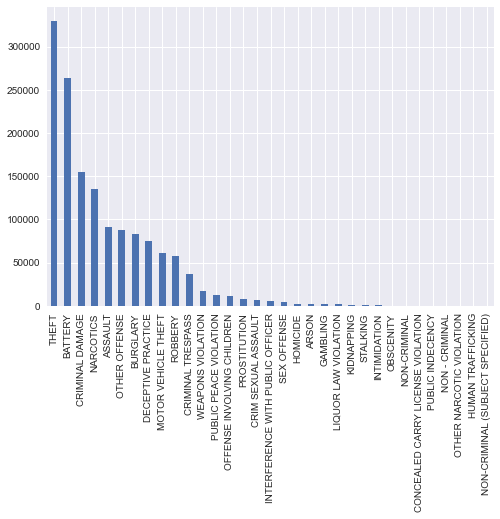

In [91]:
df['Primary Type'].value_counts().plot.bar()

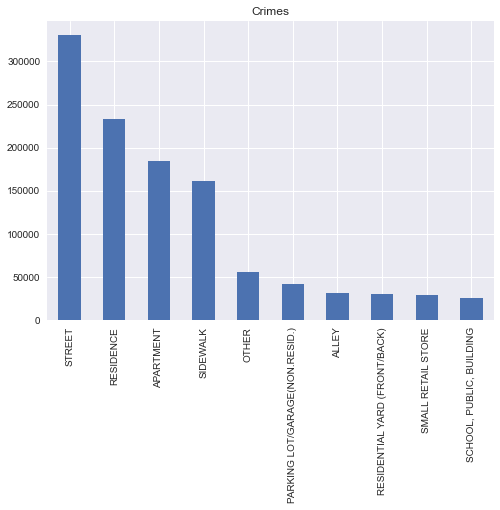

In [92]:
df['Location Description'].value_counts()[:10].plot.bar()
plt.title("Crimes")
plt.show()

In [13]:
crimes=pd.read_csv(r"D:\Capstone_proj\Chicago_Crimes_2012_to_2017.csv")

In [14]:
crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)

In [15]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

In [16]:
#As 'Location Description', 'Description' and 'Primary Type' columns are actually categorical columns (or factors in R), we will only keep the most frequent categories and then cast them to a categorical type.

In [17]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)
#type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
#crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

In [18]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

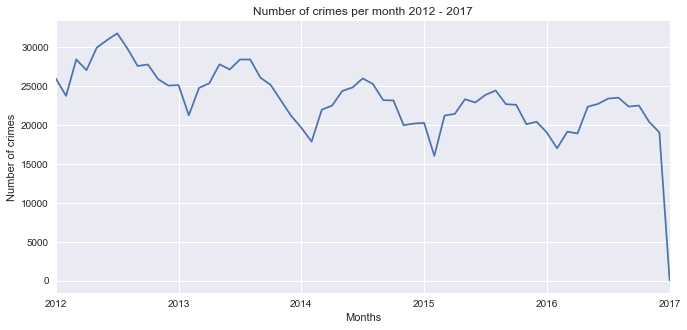

In [70]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month 2012 - 2017')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

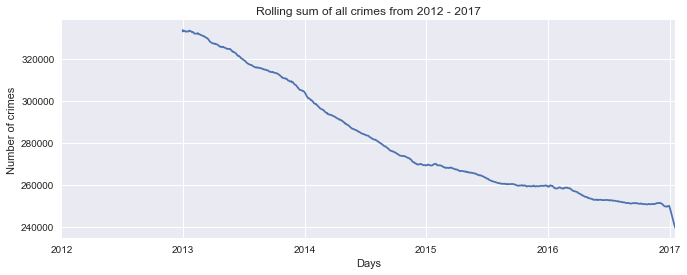

In [71]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2012 - 2017')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

In [21]:
#Seperating the crime by type

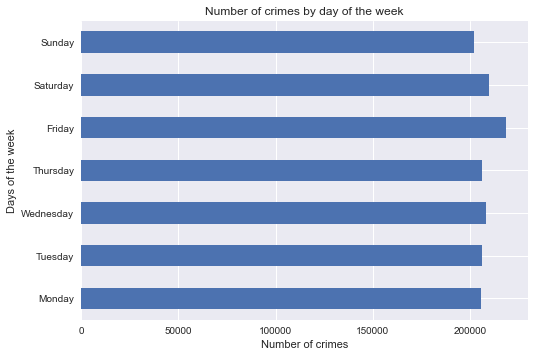

In [22]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

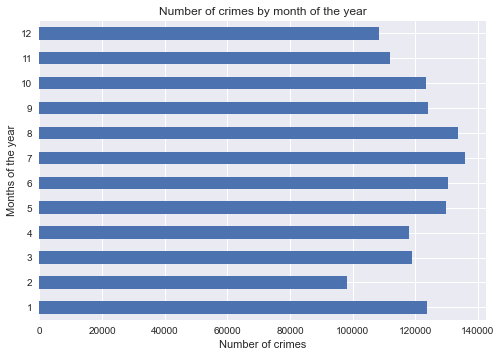

In [23]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

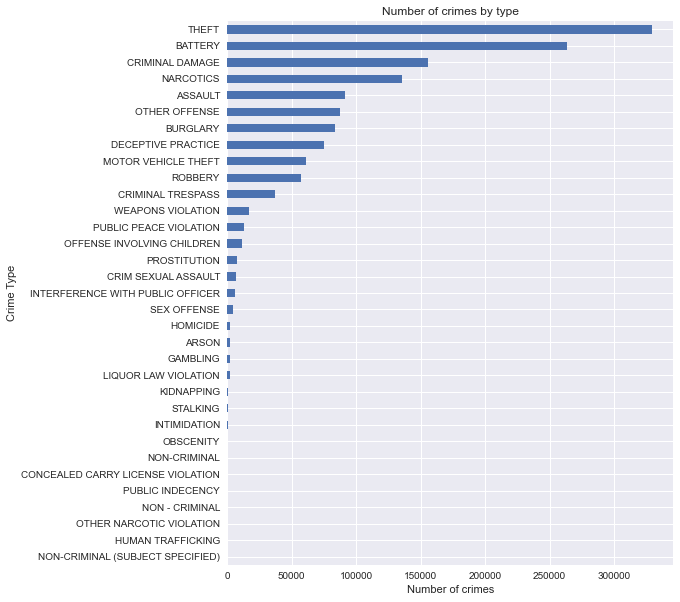

In [24]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

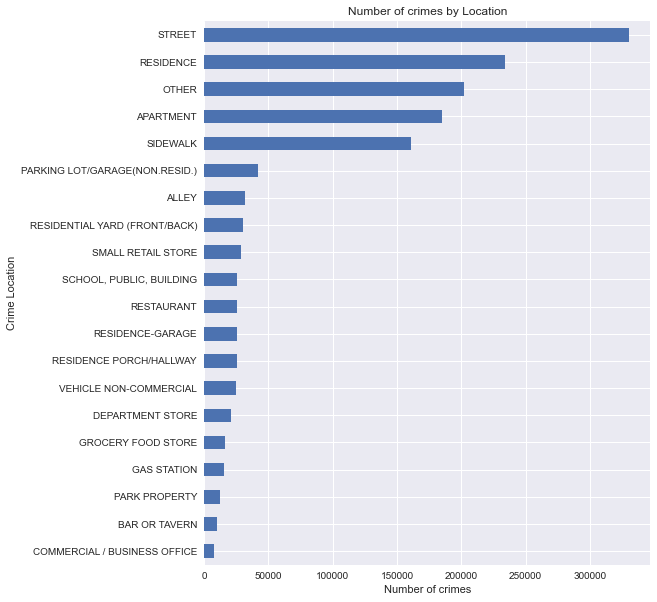

In [25]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [93]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Date_year', 'Date_month', 'Date_day',
       'Date_hour', 'Date_minute', 'Date_dayofweek'],
      dtype='object')

In [ ]:
crimes.iloc[(crimes[['Longitude']].values < -88.0).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Longitude']].values > -87.5).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values < 41.60).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values > 42.05).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.replace({'Latitude': 0.0, 'Longitude': 0.0}, np.nan, inplace=True)
crimes.dropna(inplace=True)

In [65]:
ctypes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'HOMICIDE', 'ARSON', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'STALKING', 'INTIMIDATION']

(41.6, 42.05)

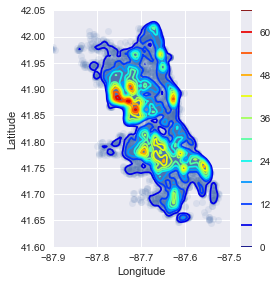

In [66]:
crimes_new = crimes[(crimes['Primary Type'] == 'SEX OFFENSE') | (crimes['Primary Type'] == 'HOMICIDE') | (crimes['Primary Type'] == 'ARSON')]
ax = sns.lmplot('Longitude', 'Latitude',
                data= crimes_new[['Longitude','Latitude']],
                fit_reg=False,
                size=4, 
                scatter_kws={'alpha':.1})
ax = sns.kdeplot(crimes_new[['Longitude','Latitude']],
                 cmap="jet", 
                 bw=.005,
                 #n_levels=10,
                 cbar=True, 
                 shade=False, 
                 shade_lowest=False)
ax.set_xlim(-87.9,-87.5)
ax.set_ylim(41.60,42.05)
#ax.set_axis_off()

(41.6, 42.05)

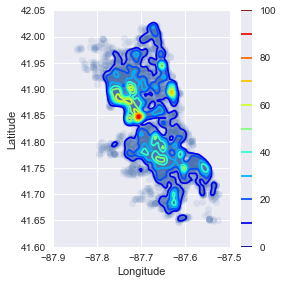

In [67]:
crimes_new = crimes[(crimes['Primary Type'] == 'LIQUOR LAW VIOLATION') | (crimes['Primary Type'] == 'HOMICIDE') | (crimes['Primary Type'] == 'ARSON')]
ax = sns.lmplot('Longitude', 'Latitude',
                data= crimes_new[['Longitude','Latitude']],
                fit_reg=False,
                size=4, 
                scatter_kws={'alpha':.1})
ax = sns.kdeplot(crimes_new[['Longitude','Latitude']],
                 cmap="jet", 
                 bw=.005,
                 #n_levels=10,
                 cbar=True, 
                 shade=False, 
                 shade_lowest=False)
ax.set_xlim(-87.9,-87.5)
ax.set_ylim(41.60,42.05)
#ax.set_axis_off()

In [27]:
df['m'] = pd.DatetimeIndex(df['Date']).month

In [29]:
#for week in df['Date'].dt.week.unique():
#this_weeks_data = df[df['Date'].dt.week == week]

In [30]:
#for week in df['Date_dayofweek']:
#    n.append(week)

In [31]:
#n[60000]

In [32]:
#df.head(500)

In [98]:
df['iucr']=df.IUCR.str.extract('(\d+)')


In [99]:
df.iucr.astype(int)

0           486
1           486
2           470
3           460
4           820
           ... 
1456709     486
1456710    1310
1456711      41
1456712     486
1456713    5007
Name: iucr, Length: 1456714, dtype: int32

In [100]:
train=df[['Beat','hour','iucr']]

In [101]:

for i in train.columns:
    if train[i].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[i].values))
        train[i] = lbl.transform(list(train[i].values))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [102]:

clustering_model = KMeans(n_clusters=3).fit(train)

In [103]:
%time clusters = clustering_model.predict(train)

Wall time: 218 ms


In [104]:
 silhouette = silhouette_score(train.values,clusters,metric='euclidean',sample_size=2000)
print("silhouette score :", silhouette)

silhouette score : 0.5332708707620536


In [105]:
final = train.join(pd.Series(clusters,index=train.index, name='cluster'))
final['cluster']= final['cluster'].map(lambda cluster_id: cluster_id)

In [106]:
size = pd.DataFrame({'size' : final["cluster"].value_counts()})

In [107]:
size.head()

,size
2,522765
1,516913
0,417036


In [108]:
final.head(120)


,Beat,hour,iucr,cluster
0,1022,15,48,2
1,313,2,48,1
2,1524,10,39,2
3,1532,12,36,2
4,1523,16,80,2
...,...,...,...,...
115,1924,10,90,0
116,623,16,148,1
117,1934,7,91,0
118,1424,1,80,2


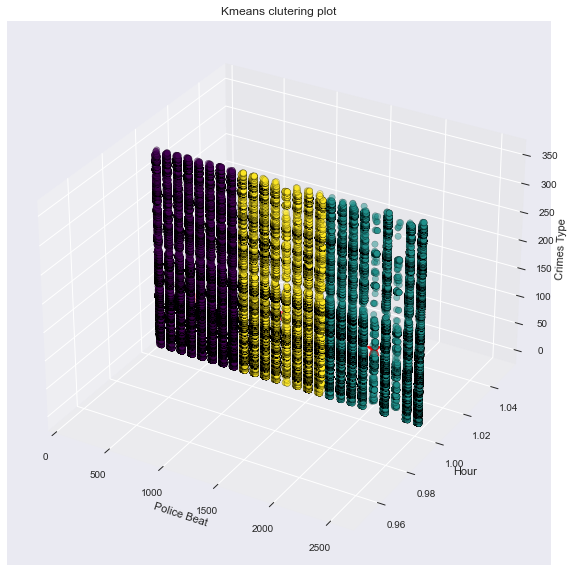

In [45]:


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection ='3d')
ax.scatter(final['Beat'],final['m'],final['iucr'], c=final['cluster'],cmap='viridis',edgecolor='k', s=40, alpha = 0.5)


ax.set_title("Kmeans clutering plot")
ax.set_xlabel("Police Beat")
ax.set_ylabel("Hour")
ax.set_zlabel("Crimes Type")
ax.dist =10



ax.scatter(clustering_model.cluster_centers_[:,0], clustering_model.cluster_centers_[:,1],\
          clustering_model.cluster_centers_[:,2], s = 300, c = 'r', marker = '*', label = 'Centroid')

plt.autoscale(enable=True, axis ='x', tight=True)
plt.show()



In [74]:
df['Beat']

0          1022
1           313
2          1524
3          1532
4          1523
           ... 
1456709    1034
1456710     731
1456711     825
1456712     423
1456713     323
Name: Beat, Length: 1456714, dtype: int64

In [95]:

df['hour'] = np.random.randint(1, 24, df.shape[0])

In [96]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Latitude,Longitude,Location,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_dayofweek,hour
0,3,10508693,HZ250496,1970-01-01 00:00:00.000000000,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,41.864073,-87.706819,"(41.864073157, -87.706818608)",1970,1,1,0,0,3,15
1,89,10508695,HZ250409,1970-01-01 00:00:00.000000001,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,41.782922,-87.604363,"(41.782921527, -87.60436317)",1970,1,1,0,0,3,2
2,197,10508697,HZ250503,1970-01-01 00:00:00.000000002,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,41.894908,-87.758372,"(41.894908283, -87.758371958)",1970,1,1,0,0,3,10
3,673,10508698,HZ250424,1970-01-01 00:00:00.000000003,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,41.885687,-87.749516,"(41.885686845, -87.749515983)",1970,1,1,0,0,3,12
4,911,10508699,HZ250455,1970-01-01 00:00:00.000000004,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,41.886297,-87.761751,"(41.886297242, -87.761750709)",1970,1,1,0,0,3,16


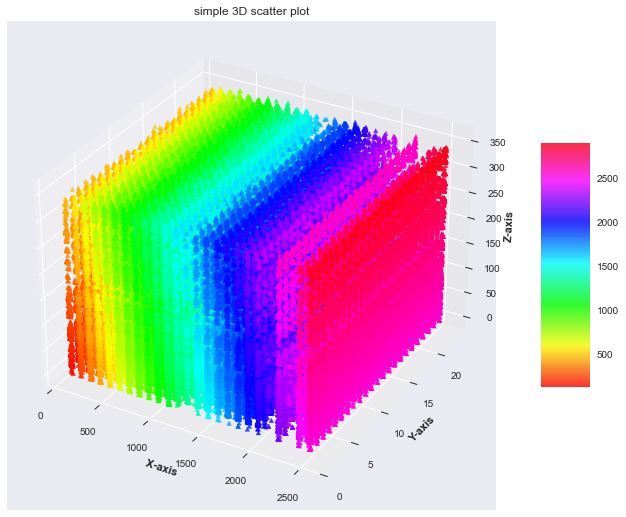

In [113]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)


# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(final['Beat'],final['hour'],final['iucr'],
                    alpha = 0.8,
                    c = (final['Beat'] + final['hour'] + final['iucr']),
                    cmap = my_cmap,
                    marker ='^')

plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()
